In [ ]:
DATA ANALYSIS AND DATASCIENCE WITH PYTHON
TASK- 2

In [ ]:
 Project 1: General EDA

In [ ]:
1. Dataset Selection

In [17]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Downloads\Global_Superstore(CSV).csv")


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
# Basic info about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [ ]:
# Data Cleaning


In [21]:
# Rename first column if needed
df.rename(columns={df.columns[0]: "Row ID"}, inplace=True)

In [22]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")


In [23]:
# Drop 'Postal Code' column only if it exists in the dataset
if "Postal Code" in df.columns:
    df.drop(columns=["Postal Code"], inplace=True)


In [24]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')


In [25]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [26]:
# Check for remaining missing values and fill them with mean (for numerical) or mode (for categorical)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [27]:
# Outlier Detection & Handling

In [28]:
# Handling outliers using Interquartile Range (IQR) for 'Profit'
Q1 = df["Profit"].quantile(0.25)
Q3 = df["Profit"].quantile(0.75)
IQR = Q3 - Q1


In [29]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [32]:
# Remove outliers from 'Profit'
df_cleaned = df[(df["Profit"] >= lower_bound) & (df["Profit"] <= upper_bound)]


In [ ]:
# Exploratory Data Analysis (EDA) 

In [45]:
# Summary statistics
print(df_cleaned.describe())

             Row ID                     Order Date  \
count    933.000000                            933   
mean   25115.124330  2014-06-06 22:59:48.424436992   
min       58.000000            2012-01-08 00:00:00   
25%    15203.000000            2013-07-13 00:00:00   
50%    25271.000000            2014-08-12 00:00:00   
75%    34731.000000            2015-06-18 00:00:00   
max    51284.000000            2015-12-31 00:00:00   
std    12911.695436                            NaN   

                           Ship Date        Sales    Quantity    Discount  \
count                            933   933.000000  933.000000  933.000000   
mean   2014-06-09 22:38:11.961414656  1584.928092    5.345123    0.084084   
min              2012-01-11 00:00:00     1.910000    1.000000    0.000000   
25%              2013-07-16 00:00:00   780.610000    3.000000    0.000000   
50%              2014-08-17 00:00:00  1513.560000    5.000000    0.000000   
75%              2015-06-21 00:00:00  2325.280000  

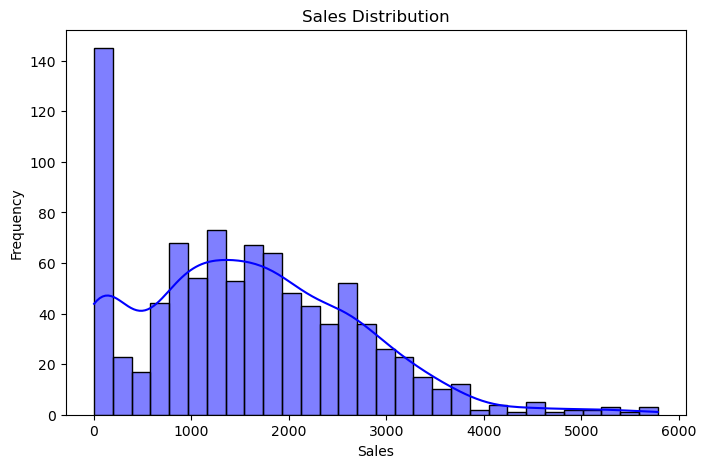

In [47]:
# Histogram for Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["Sales"], bins=30, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

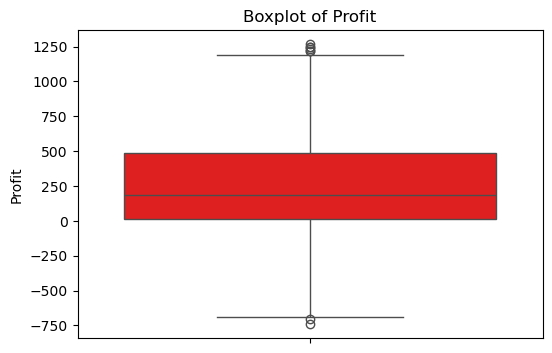

In [49]:
# Boxplot to detect outliers in Profit
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cleaned["Profit"], color="red")
plt.title("Boxplot of Profit")
plt.show()

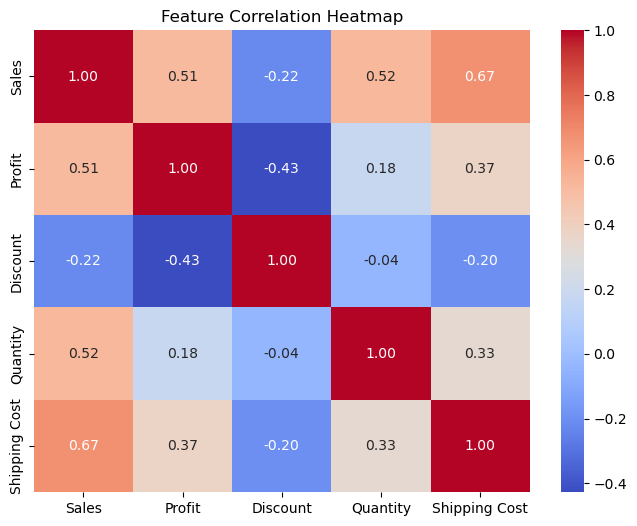

In [51]:
# Heatmap to show correlations
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[["Sales", "Profit", "Discount", "Quantity", "Shipping Cost"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
Project 2: Sales Performance Analysis

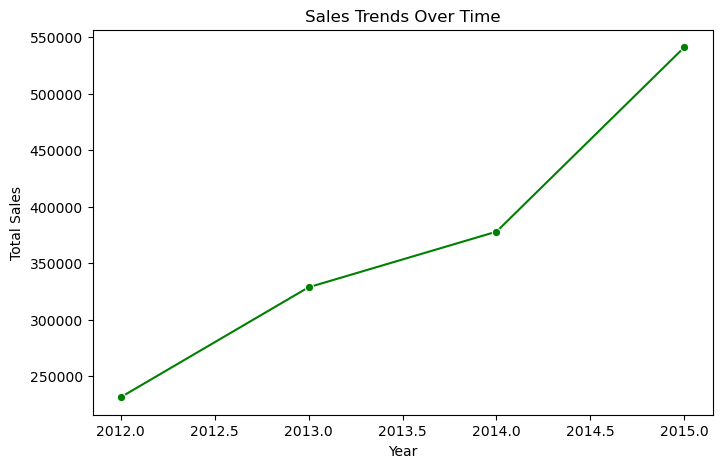

In [59]:
# Sales trends over time
df_cleaned.loc[:, "Year"] = df_cleaned["Order Date"].dt.year

sales_trend = df_cleaned.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker="o", color="green")
plt.title("Sales Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

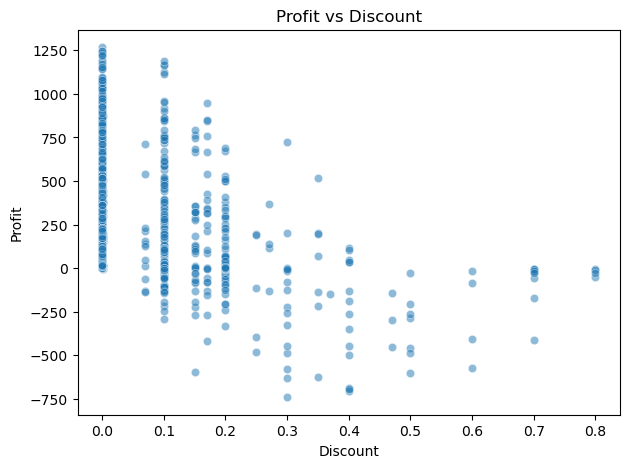

In [61]:
# Scatter plot of Profit vs. Discount
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_cleaned["Discount"], y=df_cleaned["Profit"], alpha=0.5)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


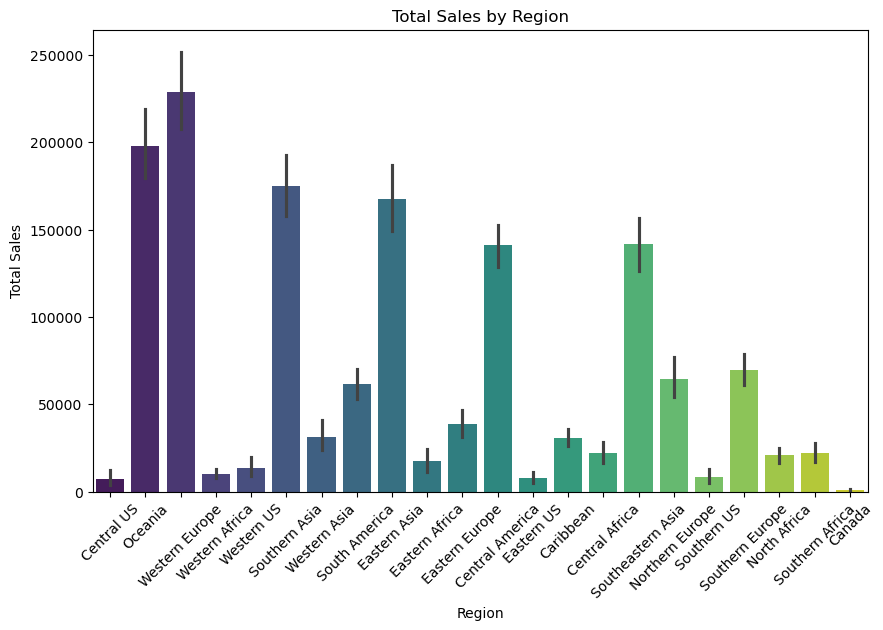

In [75]:
# Bar chart of Sales by Region
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

sns.barplot(
    x="Region", 
    y="Sales", 
    hue="Region",  # Assign 'x' variable to hue
    data=df_cleaned, 
    estimator=np.sum, 
    palette="viridis",
    legend=False  # Disable redundant legend
)

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Predictive Modeling

In [65]:
# Selecting features and target variable
features = df_cleaned[["Profit", "Discount"]]
target = df_cleaned["Sales"]

In [67]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [69]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [71]:
# Predictions
y_pred = model.predict(X_test)

In [73]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Model R² Score: 0.2862
Mean Squared Error: 851397.9848
